In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
import pandas as pd

url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
df = pd.read_csv(url)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


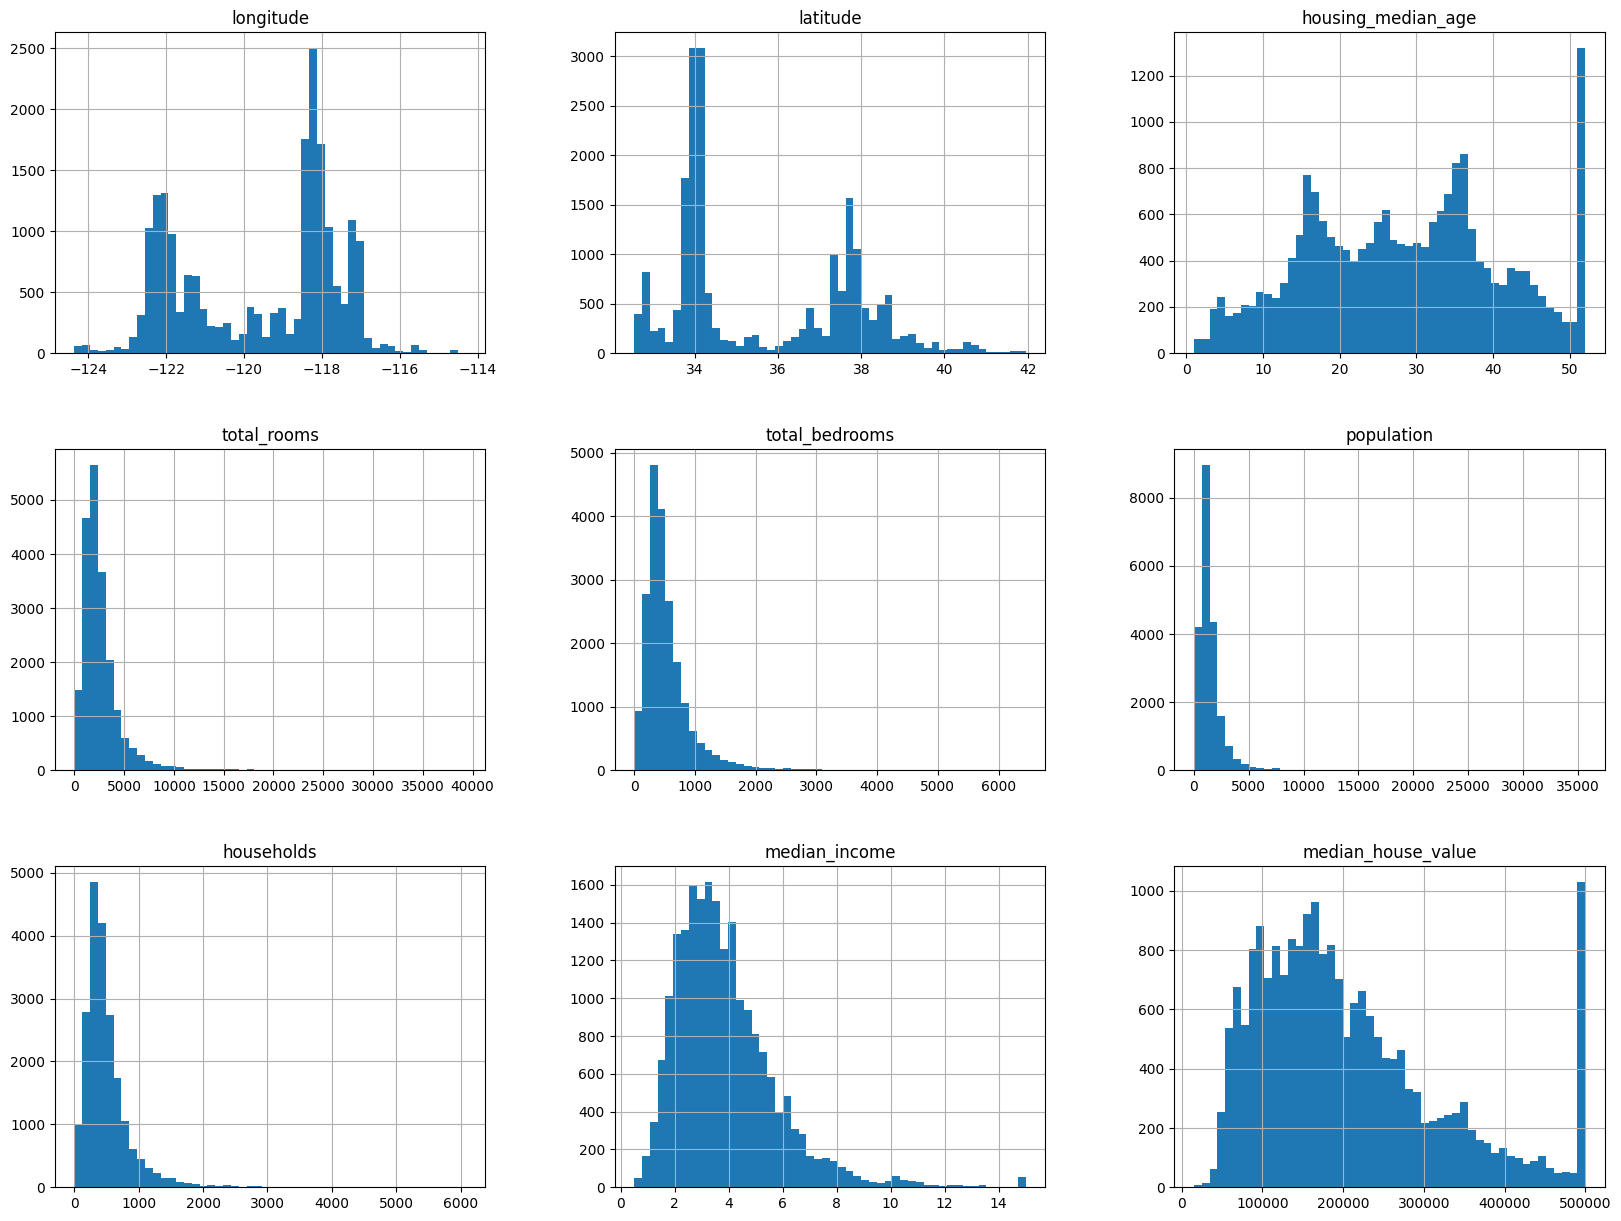

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0.,1.5,3,4.5,6,np.inf],
                          labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


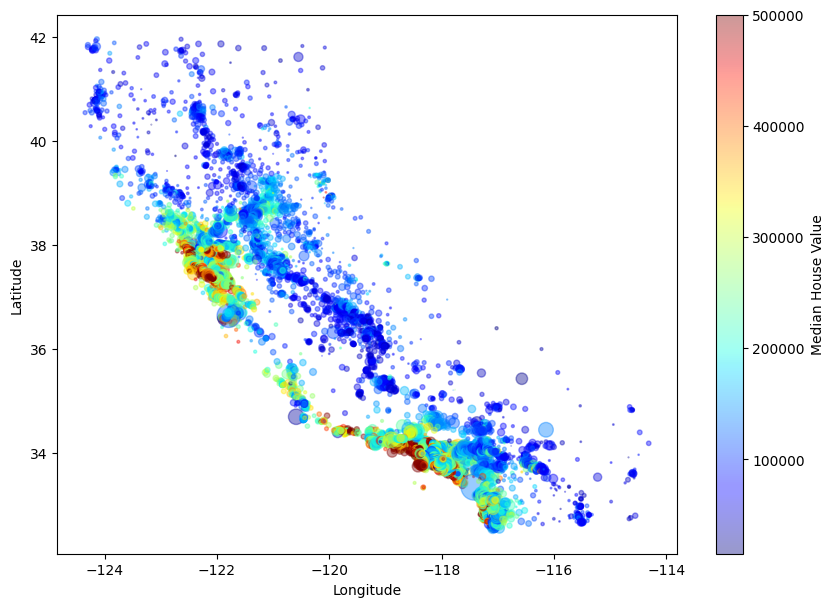

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df["longitude"], df["latitude"],
            alpha=0.4,
            s=df["population"]/100,
            c=df["median_house_value"],
            cmap="jet")
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


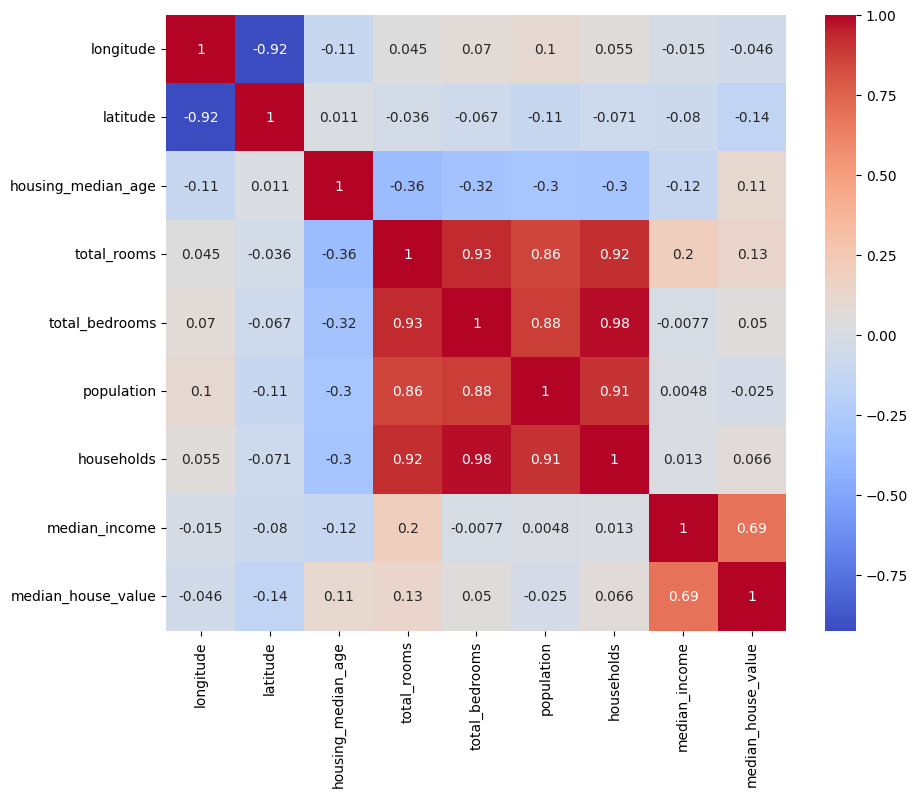

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


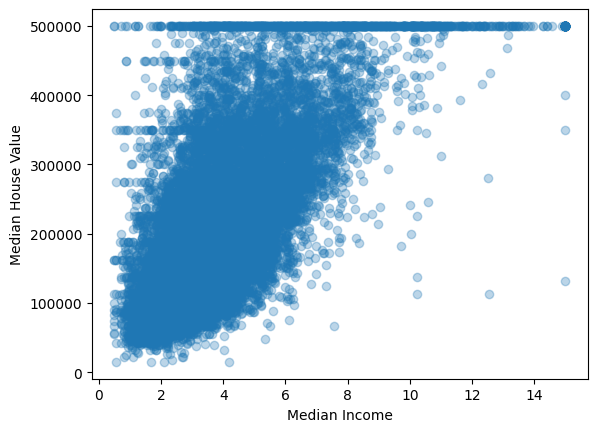

In [ ]:
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [ ]:
import pandas as pd

# Load dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
df = pd.read_csv(url)

# Create new features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


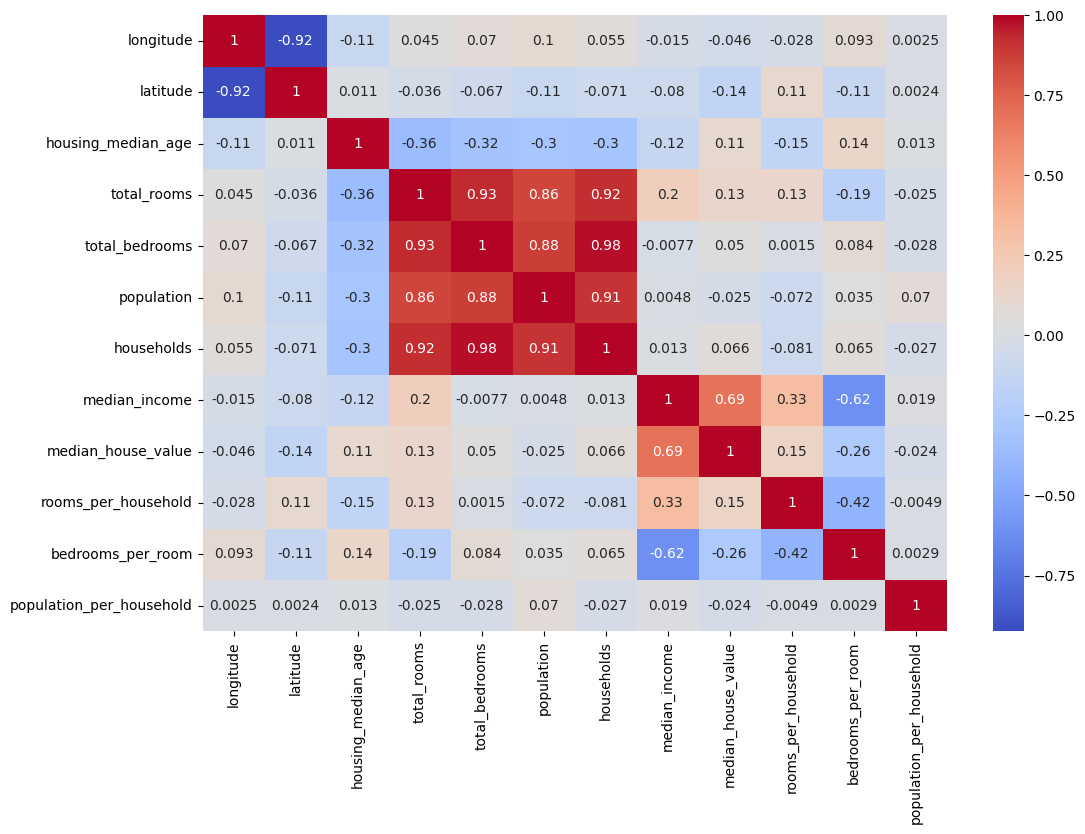

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


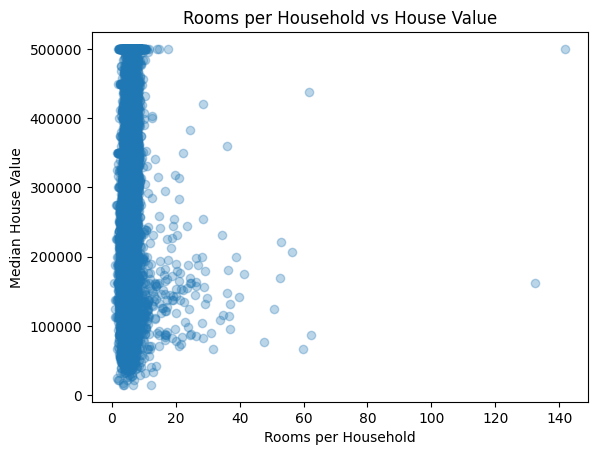

In [ ]:
plt.scatter(df["rooms_per_household"], df["median_house_value"], alpha=0.3)
plt.xlabel("Rooms per Household")
plt.ylabel("Median House Value")
plt.title("Rooms per Household vs House Value")
plt.show()


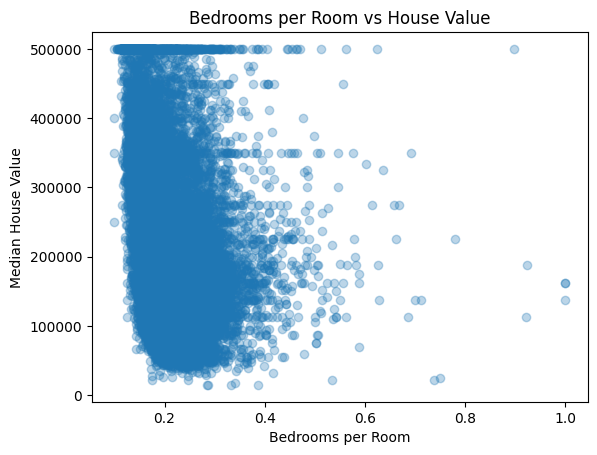

In [ ]:
plt.scatter(df["bedrooms_per_room"], df["median_house_value"], alpha=0.3)
plt.xlabel("Bedrooms per Room")
plt.ylabel("Median House Value")
plt.title("Bedrooms per Room vs House Value")
plt.show()


In [ ]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

num_data = df.drop("ocean_proximity", axis=1)
imputer.fit(num_data)

X = imputer.transform(num_data)


In [ ]:
encoder = OneHotEncoder()
housing_cat = df[["ocean_proximity"]]
housing_cat_1hot = encoder.fit_transform(housing_cat)

print(encoder.categories_)


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)


In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:,5] / X[:,6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,4] / X[:,3]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                         population_per_household]


In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('scaler', StandardScaler()),
])


In [ ]:
num_attribs = list(df.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(df)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prepared, df["median_house_value"])


LinearRegression()

In [ ]:
import pandas as pd

url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
housing = pd.read_csv(url)

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_labels = housing["median_house_value"]
housing = housing.drop("median_house_value", axis=1)


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X,
                         rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X,
                         rooms_per_household,
                         population_per_household]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", CombinedAttributesAdder()),
        ("scaler", StandardScaler()),
])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = housing.drop("ocean_proximity", axis=1).columns
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
])


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared.shape


(20640, 16)

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)


In [ ]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ("preparation", full_pipeline),
    ("linear_regression", LinearRegression())
])

model.fit(housing, housing_labels)


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])